In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
# pip install pyspellchecker

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

path_df1 = "data/all.jsonl"
path_df2 = "data/data.csv"


def get_data_df1(file_path):
    df = pd.read_json(file_path, lines=True)
    df = df.drop(['source', 'index', 'question'], axis=1)
    human_df = pd.DataFrame(df["human_answers"].explode("human_answers")).rename(columns={"human_answers": "text"})
    human_df["label"] = 1

    chatgpt_df = pd.DataFrame(df["chatgpt_answers"].explode("chatgpt_answers")).rename(columns={"chatgpt_answers": "text"})
    chatgpt_df["label"] = 0

    df = pd.concat([human_df, chatgpt_df], ignore_index=True)
    df["text"] = df["text"].astype(str)

    return df # train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)


def get_data_df2(file_path):
    df = pd.read_csv(file_path)
    return df.drop(['src'], axis=1)


def get_data_mixed():
    df1 = get_data_df1(path_df1)
    df2 = get_data_df2(path_df2)
    return pd.concat([df1, df2], ignore_index=True)


# df2 = get_data_df1(path_df1) # ancien 
df = get_data_df2(path_df2) # nouveau 

In [12]:
df.shape

(56819, 2)

In [13]:
df.head()

text  label
0  Little disclaimer: this deals with US laws and...      1
1  Read: Mentally Retarded Downs. See, we've got ...      1
2  If any of you frequent rbadhistory, there is a...      1
3  I believe in a flat tax system, where everyone...      1
4  Edit: Ok guy's, my views have been changed on ...      1

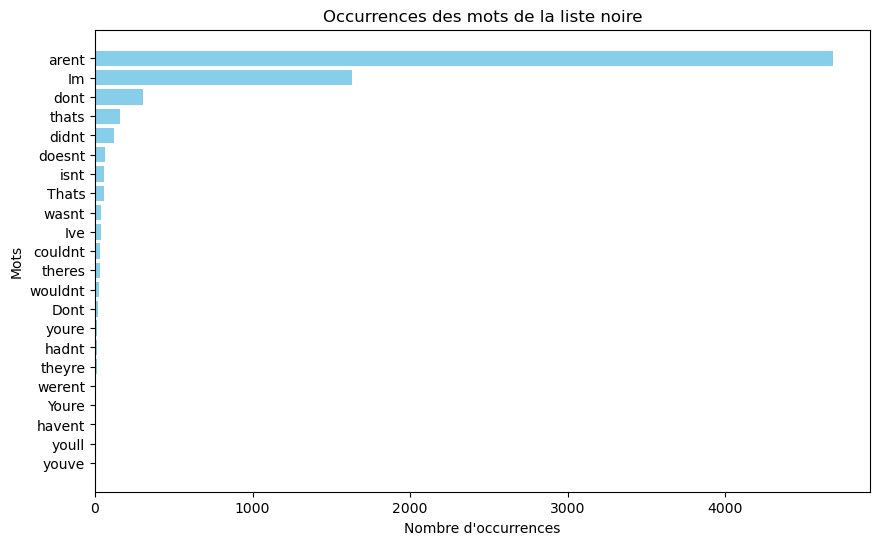

In [35]:
import matplotlib.pyplot as plt

# Liste noire de mots à considérer comme des erreurs
blacklisted_words = {"didnt","dont","Im","youre","Ive","doesnt","wasnt","couldnt","wasnt","couldnt","thats","isnt","Thats","thats",
"theres","theyre","wouldnt","Youre","arent","youll","Dont","theres","youve","havent","hadnt","werent"
}

# Dictionnaire pour compter les occurrences des mots de la liste noire dans les textes
blacklisted_counts = {word: sum(text.count(word) for text in df['text']) for word in blacklisted_words}

# Filtrer les mots avec au moins une occurrence
filtered_counts = {word: count for word, count in blacklisted_counts.items() if count > 0}

# Trier le dictionnaire par valeur pour obtenir les mots avec le plus d'occurrences
sorted_counts = sorted(filtered_counts.items(), key=lambda x: x[1], reverse=True)

# Extraire les données pour le graphique
words = [word for word, count in sorted_counts]
counts = [count for word, count in sorted_counts]

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Mots')
plt.title('Occurrences des mots de la liste noire')
plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir les mots les plus fréquents en haut
plt.show()
